In [44]:
import osmnx as ox
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import h3

In [45]:
import osmnx as ox


# 嘗試查詢維吉尼亞海灘的範圍
gdf = ox.geocode_to_gdf('Virginia Beach, Virginia, USA')

# 打印出查詢結果
print(gdf)


                                            geometry  bbox_north  bbox_south  \
0  POLYGON ((-76.22824 36.83253, -76.22820 36.832...   37.030248   36.550416   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat        lon  \
0 -75.831895 -76.228243  320353039  relation  206670  36.849658 -75.976075   

      class            type  place_rank  importance addresstype  \
0  boundary  administrative          12    0.598645        city   

             name                             display_name  
0  Virginia Beach  Virginia Beach, Virginia, United States  


行政區背景已繪製


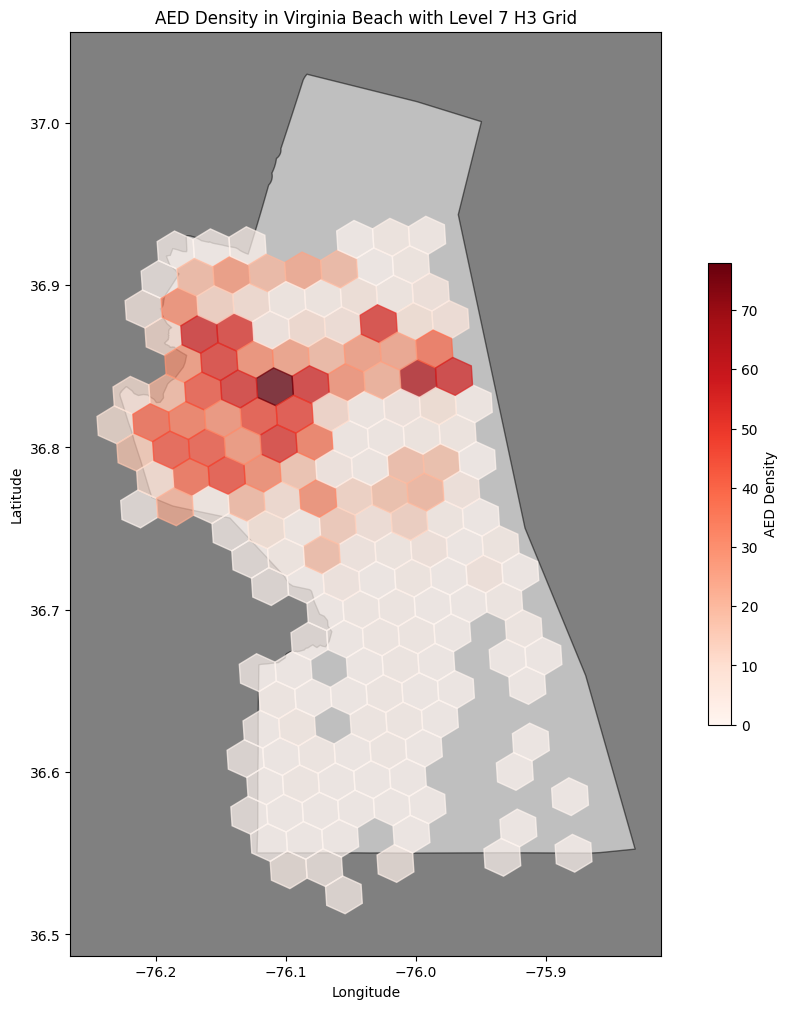

In [46]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import h3
from shapely.geometry import Polygon
import numpy as np

# Step 1: 讀取網格數據
h3_l7_df = pd.read_csv('h3_l7_df_new.csv')

# # Step 2: 獲取行政區域資料
# districts = ox.geocode_to_gdf([
#     'Bayside, Virginia Beach, Virginia, USA',
#     'Princess Anne, Virginia Beach, Virginia, USA',
#     'Kempsville, Virginia Beach, Virginia, USA',
#     'Oceanfront, Virginia Beach, Virginia, USA',
#     'Lynnhaven, Virginia Beach, Virginia, USA'
# ])

districts = ox.geocode_to_gdf([
    'Virginia Beach, Virginia, USA',
])



# Step 3: 繪製行政區背景
fig, ax = plt.subplots(figsize=(12, 12))
districts.plot(ax=ax, facecolor='white', edgecolor='black', alpha=0.5)
print('行政區背景已繪製')

# Step 4: 計算各網格內的 AED 密度
density = h3_l7_df[['id', 'ohca']]

# Step 5: 繪製每個網格
for index, row in density.iterrows():
    # 將 H3 索引轉換為多邊形
    boundary = h3.h3_to_geo_boundary(row['id'], geo_json=True)
    polygon = Polygon(boundary)
    # 根據密度決定顏色
    color_norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
    color = plt.cm.Reds(color_norm(row['ohca']))
    ax.fill(*zip(*polygon.exterior.coords), color=color, alpha=0.7)

# Step 6: 創建並顯示顏色條
norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', label='AED Density', shrink=0.5)

# Step 7: 設定地圖的細節
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('AED Density in Virginia Beach with Level 7 H3 Grid')
ax.set_facecolor('grey')

# 顯示地圖
plt.show()


# fig.savefig('AED_Shenzhen.png')